 ## Feature engg. method 
 + 1. One Hot Encoding - variables with many categories
 + 2. Count_frequency_encoding
 + 3. Ordinal numbering encoding or Label Encoding
 + 4. Feature engg. data 




 ### 1. One Hot Encoding - variables with many categories


In [2]:

import pandas as pd
import numpy as np



data = pd.read_csv('Complete-Feature-Engineering-master/mercedesbenz.csv', usecols=['X1', 'X2'])
df = data.copy()
df.head()

,X1,X2
0,v,at
1,t,av
2,w,n
3,t,n
4,v,n


In [3]:
for col in df:
    print(df[col].unique())

['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']
['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar']


In [4]:
df['X1'].unique()

array(['v', 't', 'w', 'b', 'r', 'l', 's', 'aa', 'c', 'a', 'e', 'h', 'z',
       'j', 'o', 'u', 'p', 'n', 'i', 'y', 'd', 'f', 'm', 'k', 'g', 'q',
       'ab'], dtype=object)

In [5]:
df['X1'].unique()

array(['v', 't', 'w', 'b', 'r', 'l', 's', 'aa', 'c', 'a', 'e', 'h', 'z',
       'j', 'o', 'u', 'p', 'n', 'i', 'y', 'd', 'f', 'm', 'k', 'g', 'q',
       'ab'], dtype=object)

In [6]:
len(df['X1'].unique())

27

In [7]:
len(df['X2'].unique())

44

In [8]:
# let's have a look at how many labels each variable has

for col in df.columns:
    print(col,':',len(df[col].unique()),'label')

X1 : 27 label
X2 : 44 label


In [9]:
# let's find the top 10 most frequent categories for the variable X2

df.X2.value_counts().sort_values(ascending=False).head(20)

as    1659
ae     496
ai     415
m      367
ak     265
r      153
n      137
s       94
f       87
e       81
aq      63
ay      54
a       47
t       29
i       25
k       25
b       21
ao      20
z       19
ag      19
Name: X2, dtype: int64

In [10]:
# let's make a list with the most frequent categories of the variable

top_10_labels = [y for y in df.X2.value_counts().sort_values(ascending=False).head(10).index]
top_10_labels

['as', 'ae', 'ai', 'm', 'ak', 'r', 'n', 's', 'f', 'e']

In [11]:
# get whole set of dummy variables, for all the categorical variables

def one_hot_encoding_top_x(df, variable, top_x_labels):
    # function to create the dummy variables for the most frequent labels
    # we can vary the number of most frequent labels that we encode
    
    for label in top_x_labels:
        df[variable+'_'+label] = np.where(df[variable]==label, 1, 0)



In [12]:
# read the data again


# encode X2 into the 10 most frequent categories
one_hot_encoding_top_x(df, 'X2', top_10_labels)
df.head()

,X1,X2,X2_as,X2_ae,X2_ai,X2_m,X2_ak,X2_r,X2_n,X2_s,X2_f,X2_e
0,v,at,0,0,0,0,0,0,0,0,0,0
1,t,av,0,0,0,0,0,0,0,0,0,0
2,w,n,0,0,0,0,0,0,1,0,0,0
3,t,n,0,0,0,0,0,0,1,0,0,0
4,v,n,0,0,0,0,0,0,1,0,0,0


## 2.Count_frequency_encoding

In [13]:
# let's obtain the counts for each one of the labels in variable X2
# let's capture this in a dictionary that we can use to re-map the labels

data.X2.value_counts().to_dict()

{'as': 1659,
 'ae': 496,
 'ai': 415,
 'm': 367,
 'ak': 265,
 'r': 153,
 'n': 137,
 's': 94,
 'f': 87,
 'e': 81,
 'aq': 63,
 'ay': 54,
 'a': 47,
 't': 29,
 'i': 25,
 'k': 25,
 'b': 21,
 'ao': 20,
 'z': 19,
 'ag': 19,
 'd': 18,
 'ac': 13,
 'g': 12,
 'ap': 11,
 'y': 11,
 'x': 10,
 'aw': 8,
 'h': 6,
 'at': 6,
 'q': 5,
 'an': 5,
 'al': 5,
 'p': 4,
 'av': 4,
 'ah': 4,
 'au': 3,
 'c': 1,
 'ar': 1,
 'j': 1,
 'o': 1,
 'l': 1,
 'aa': 1,
 'af': 1,
 'am': 1}

In [14]:
# And now let's replace each label in X2 by its count

# first we make a dictionary that maps each label to the counts
df_frequency_map = data.X2.value_counts().to_dict()

In [15]:
data.head(20)

,X1,X2
0,v,at
1,t,av
2,w,n
3,t,n
4,v,n
5,b,e
6,r,e
7,l,as
8,s,as
9,b,aq


In [16]:
# and now we replace X2 labels in the dataset df
data.X2 = df.X2.map(df_frequency_map)

data.head()

,X1,X2
0,v,6
1,t,4
2,w,137
3,t,137
4,v,137


## 3 Ordinal numbering encoding or Label Encoding



In [18]:
# create a variable with dates, and from that extract the weekday
# I create a list of dates with 20 days difference from today
# and then transform it into a datafame
import pandas as pd
import datetime


df_base = datetime.datetime.today()
df_date_list = [df_base - datetime.timedelta(days=x) for x in range(0, 20)]
df = pd.DataFrame(df_date_list)
df.columns = ['day']
df

,day
0,2020-05-25 23:16:53.790156
1,2020-05-24 23:16:53.790156
2,2020-05-23 23:16:53.790156
3,2020-05-22 23:16:53.790156
4,2020-05-21 23:16:53.790156
5,2020-05-20 23:16:53.790156
6,2020-05-19 23:16:53.790156
7,2020-05-18 23:16:53.790156
8,2020-05-17 23:16:53.790156
9,2020-05-16 23:16:53.790156


In [35]:
# extract the week day name

df['day_of_week'] = df['day'].dt.weekday
df.head(10)

,day,day_of_week
0,2020-05-25 23:16:53.790156,0
1,2020-05-24 23:16:53.790156,6
2,2020-05-23 23:16:53.790156,5
3,2020-05-22 23:16:53.790156,4
4,2020-05-21 23:16:53.790156,3
5,2020-05-20 23:16:53.790156,2
6,2020-05-19 23:16:53.790156,1
7,2020-05-18 23:16:53.790156,0
8,2020-05-17 23:16:53.790156,6
9,2020-05-16 23:16:53.790156,5


# Feature engg. method data

 + non-linear data into linear data

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [41]:
data =pd.read_csv('titanic.csv',usecols=['age','fare','survived'])

In [42]:
data.head()

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [43]:
data.isnull().sum()

survived      0
age         177
fare          0
dtype: int64

In [48]:
data=data.dropna()

In [49]:
data.isnull().sum()

survived    0
age         0
fare        0
dtype: int64

## Q-Q plot

In [55]:
def diagnostic_plot(df,varable):
    
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    df[varable].hist()
    
    plt.subplot(1,2,2)
    stats.probplot(df[varable],dist="norm",plot=plt)
    plt.show

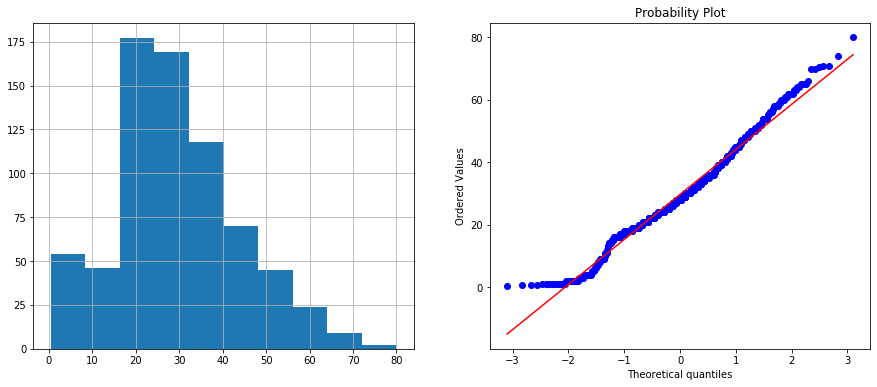

In [57]:
diagnostic_plot(data,'age')

In [58]:
# this one is ok

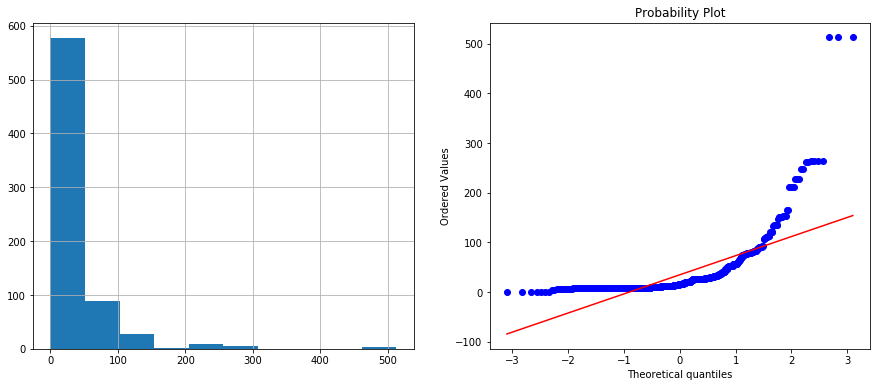

In [60]:
diagnostic_plot(data,'fare')

### logarithmic transform

C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


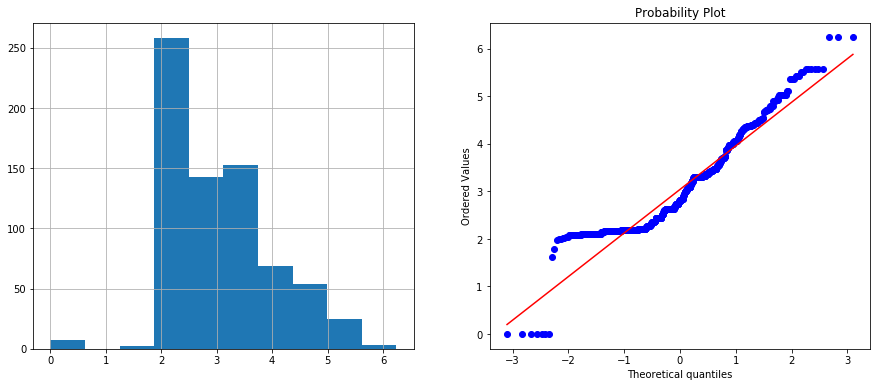

In [62]:
data['log_fare']=np.log(data['fare']+1)

diagnostic_plot(data,'log_fare')



### Reciprocal tr

C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


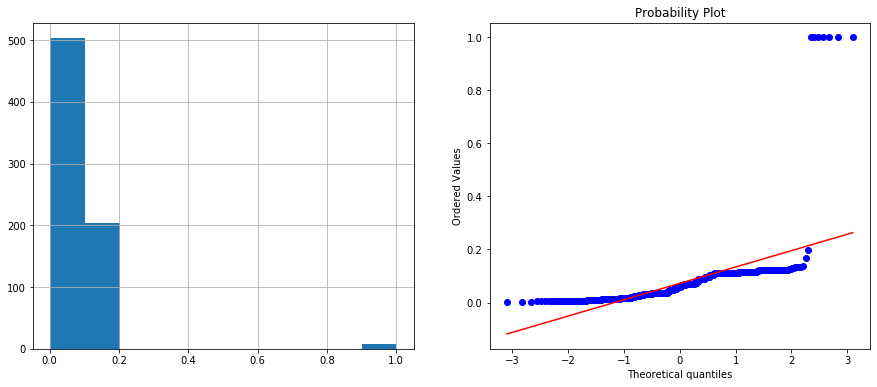

In [63]:
data['rep_fare']=1/((data['fare']+1))

diagnostic_plot(data,'rep_fare')



### Sqaure root tr

C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


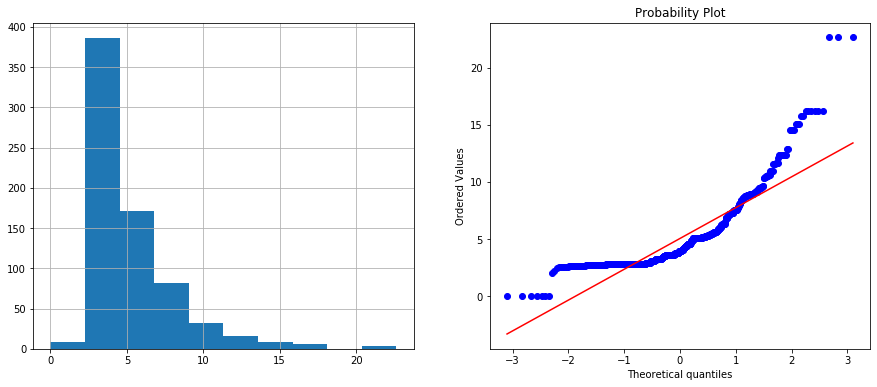

In [64]:
data['sqr_fare']=(data['fare'])**(1/2)

diagnostic_plot(data,'sqr_fare')



### Exponential tr

C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


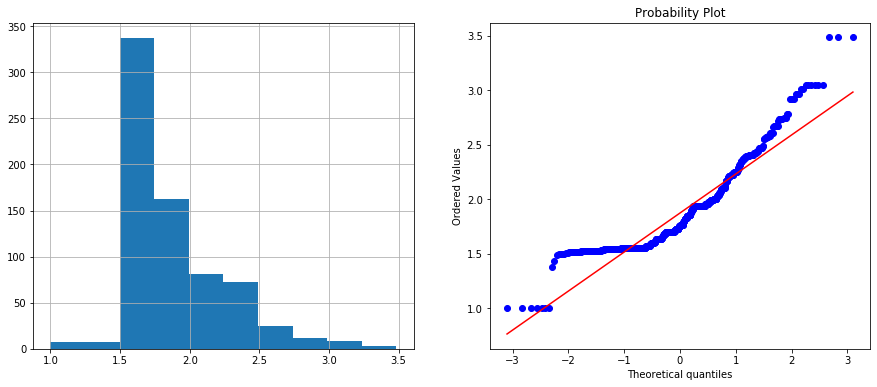

In [66]:
data['exp_fare']=(data['fare']+1)**(1/5)

diagnostic_plot(data,'exp_fare')



### BoxCox

C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Optimal Lambda:  -0.15008961272465127


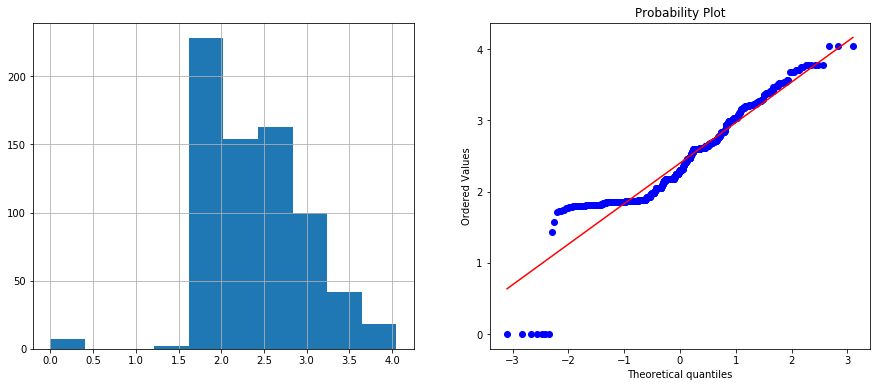

In [73]:
data['box_fare'],param = stats.boxcox(data.fare+1)
print('Optimal Lambda: ', param)
diagnostic_plot(data,'box_fare')

In [74]:
# log tr good costion distribution